In [2]:
# Importing OpenCV and Numpy Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [28]:
# custom
import sys
# Grayscale Image
def processImage(image):
    image = cv2.imread(image)
    image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)
    return image

In [4]:
def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

In [27]:
if __name__ == '__main__':
    # Grayscale Image
    image = processImage('/content/bike2p.jpg')

    kernel = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 1]])

    # Convolve and Save Output
    output = convolve2D(image, kernel, padding=2)
    cv2.imwrite('2DConvolved.jpg', output)

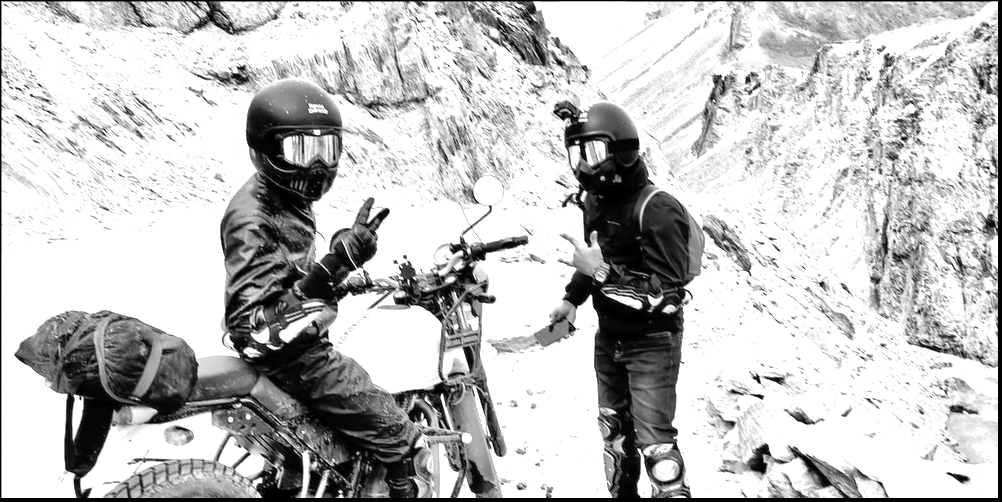

In [25]:
cv2_imshow(output)

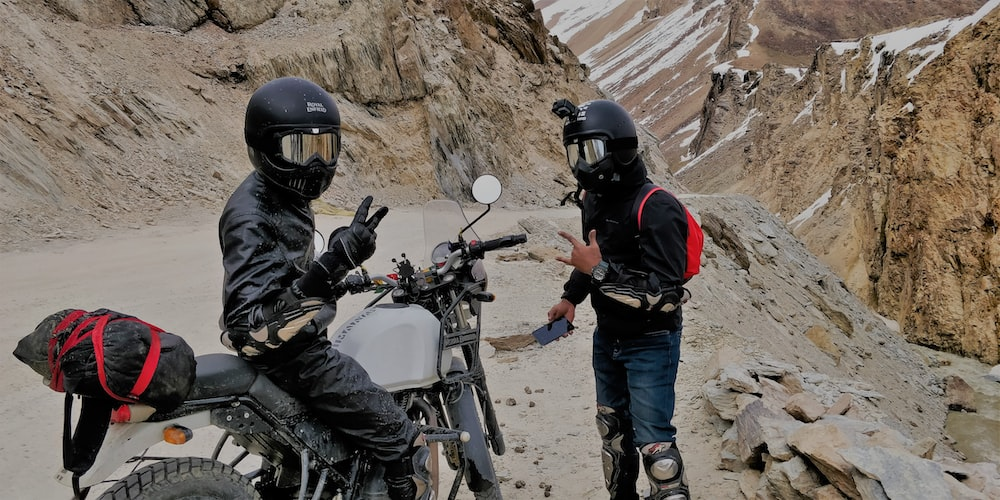

In [ ]:
# Read the image
img = cv2.imread('/content/bike2p.jpg')
cv2_imshow(img)

In [ ]:
# Apply identity kernel In an Identity Kernel matrix the value of the middle element is 1 The values of all 
# the other elements are 0
id_kernel = np.array([[0, 0, 0],
                    [0, 1, 0],
                    [0, 0, 0]])

In [ ]:
# Filtered image is obtained using the variable flt_img cv2.fliter2D() is the function used
# src is the source of image(here, img)
# ddepth is destination depth. -1 will mean output image will have same depth as input image
# kernel is used for specifying the kernel operation (here, id_kernel)
flt_img = cv2.filter2D(src=img, ddepth=-1, kernel=id_kernel)

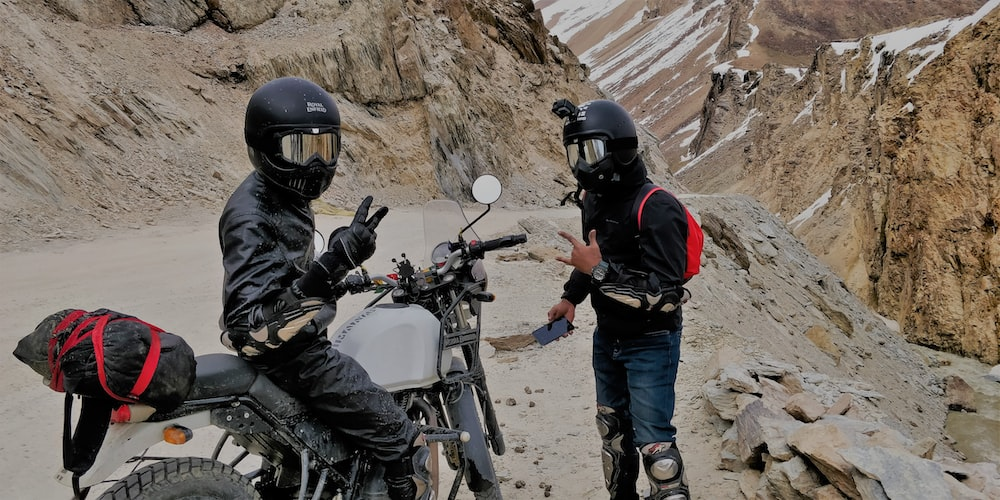

In [ ]:
# Display the filtered image using cv2.imshow() function
# Here, output image is same as input image since we are using identity kernel
from google.colab.patches import cv2_imshow
cv2_imshow(flt_img)

In [ ]:
# Kernel for box blur filter
# It is a unity matrix which is divided by 9 
box_blur_ker = np.array([[0.1111111, 0.1111111, 0.1111111],
                    [0.1111111, 0.1111111, 0.1111111],
                    [0.1111111, 0.1111111, 0.1111111]])

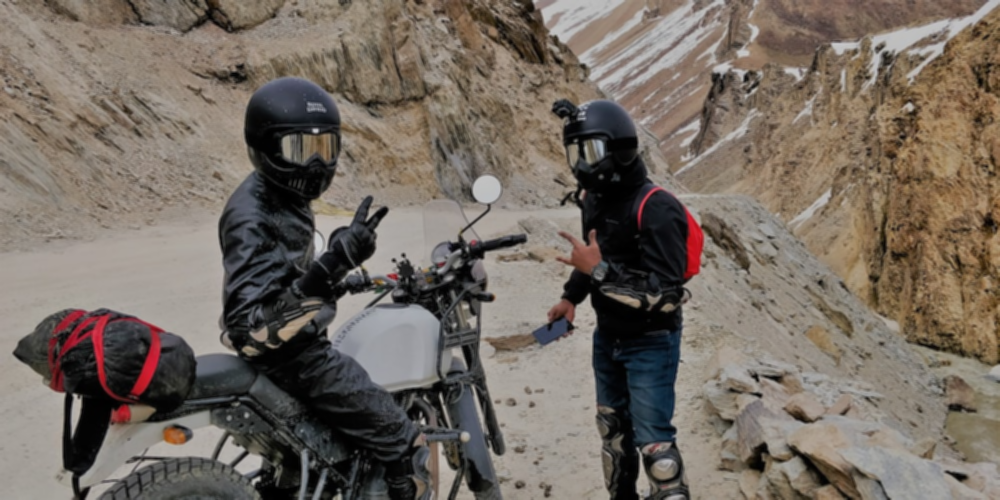

In [ ]:
# Applying Box Blur effect
# Using the cv2.filter2D() function
# src is the source of image(here, img)
# ddepth is destination depth. -1 will mean output image will have same depth as input image
# kernel is used for specifying the kernel operation (here, box_blur_ker)
Box_blur = cv2.filter2D(src=img, ddepth=-1, kernel=box_blur_ker)
  
# Showing the box blur image using matplotlib library function plt.imshow()
cv2_imshow(Box_blur)

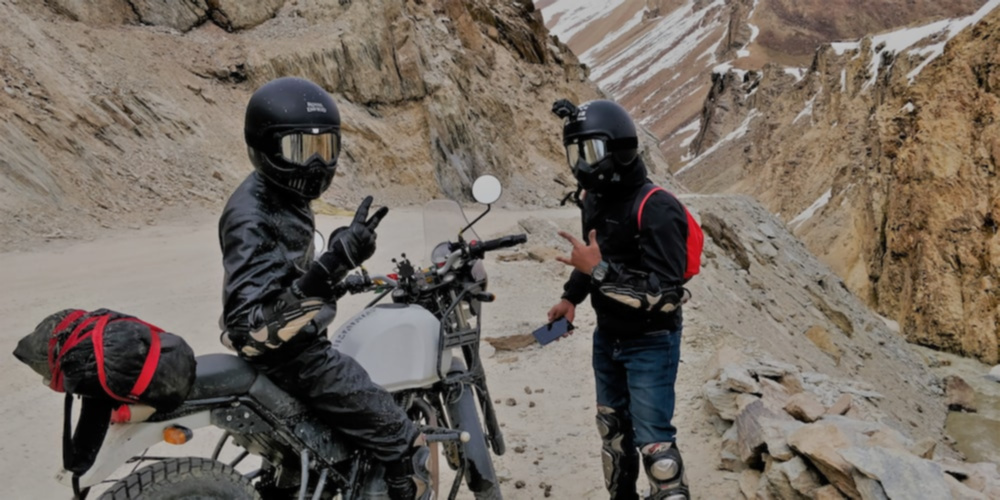

In [ ]:
# Gaussian Blur

# Applying Gaussian Blur Filter using cv2.GaussianBlur() function
# src is the source of image(here, img)
# ksize is the size of kernel in the form A x B (here 3 x 3)
# sigmaX is standard deviation of X axis
# sigmaY is the standard deviation of Y axis
# Since sigmaX and sigmaY is 0, the standard deviation the size of kernel
gaussian_blur = cv2.GaussianBlur(src=img, ksize=(3,3),sigmaX=0, sigmaY=0)

# Showing the Gaussian blur image using matplotlib library function plt.imshow()
cv2_imshow(gaussian_blur)

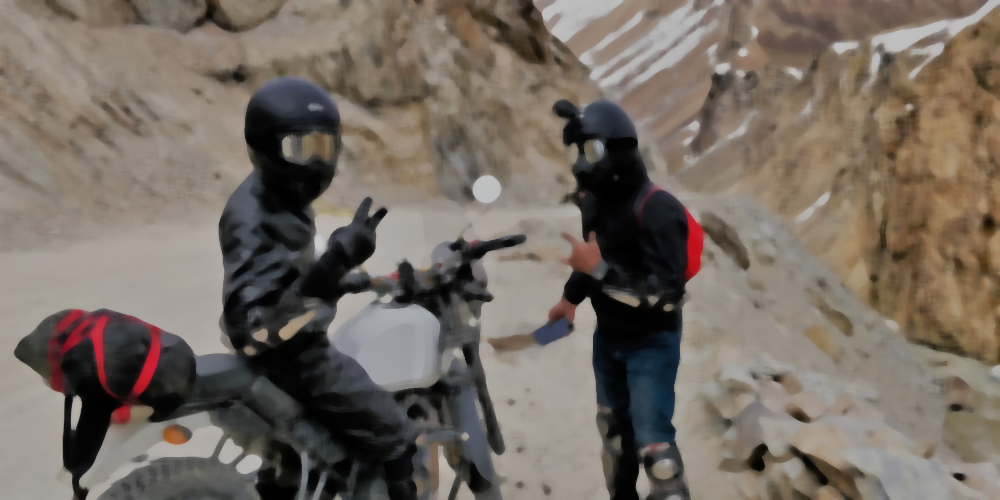

In [ ]:
# Applying median Blur Filter using cv2.medianBlur() function
# src is the source of image(here, img)
# ksize is the size of kernel. Should have a positive odd value
median_blur = cv2.medianBlur(src=img, ksize=9)
  
# Showing the Median blur image using matplotlib library function plt.imshow()
cv2_imshow(median_blur)

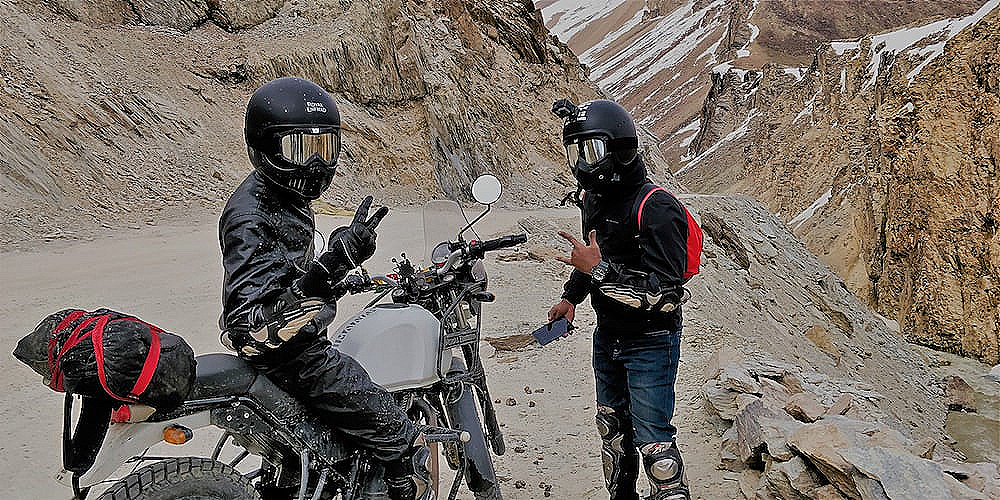

In [ ]:
# Apply kernel for sharpening
sharp_kernel = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
  
# Sharpeneded image is obtained using the variable sharp_img
# cv2.fliter2D() is the function used
# src is the source of image(here, img)
# ddepth is destination depth. -1 will mean output image will have same depth as input image
# kernel is used for specifying the kernel operation (here, sharp_kernel)
sharp_img = cv2.filter2D(src=img, ddepth=-1, kernel=sharp_kernel)
  
# Showing the sharpened image using matplotlib library function plt.imshow()
cv2_imshow(sharp_img)